In [47]:
import matplotlib.pyplot as plt
import csv

In [252]:
data_tasklet_scaling = """results_and_timings(cycles), 1, 1, 60000, 2.77179e+10, 2875.171000, 71.721000, 254.870000, 80.025000, 79198.387000, 6.425000, 389.597000
results_and_timings(cycles), 1, 2, 60000, 6.95219e+09, 2871.276000, 71.555000, 262.798000, 92.999000, 39725.739000, 6.458000, 377.566000
results_and_timings(cycles), 1, 3, 60000, 3.11702e+09, 2875.875000, 71.522000, 254.361000, 79.836000, 26716.930000, 6.488000, 386.601000
results_and_timings(cycles), 1, 4, 60000, 1.77009e+09, 2872.633000, 71.357000, 264.011000, 92.560000, 20229.888000, 6.492000, 382.962000
results_and_timings(cycles), 1, 5, 60000, 1.14069e+09, 2881.506000, 71.782000, 263.960000, 91.068000, 16296.015000, 6.418000, 383.126000
results_and_timings(cycles), 1, 6, 60000, 7.99256e+08, 2882.602000, 71.752000, 262.521000, 81.278000, 13701.916000, 6.498000, 378.533000
results_and_timings(cycles), 1, 9, 60000, 3.76585e+08, 2874.783000, 71.816000, 262.994000, 86.161000, 9683.975000, 6.454000, 380.238000
results_and_timings(cycles), 1, 12, 60000, 2.44971e+08, 2876.763000, 71.719000, 257.705000, 92.245000, 8399.371000, 6.448000, 392.402000
results_and_timings(cycles), 1, 16, 60000, 1.79954e+08, 2869.969000, 71.505000, 263.339000, 84.728000, 8226.830000, 6.423000, 385.109000
results_and_timings(cycles), 1, 20, 60000, 1.43959e+08, 2874.191000, 71.607000, 256.664000, 90.316000, 8226.608000, 6.455000, 387.487000
results_and_timings(cycles), 1, 24, 60000, 1.19965e+08, 2871.661000, 71.610000, 255.372000, 82.840000, 8226.544000, 6.404000, 388.683000"""

data_sample_scaling = """results_and_timings(cycles), 1, 16, 500, 1.51743e+06, 19.389000, 0.510000, 0.953000, 12.076000, 69.636000, 0.173000, 8.117000
results_and_timings(cycles), 1, 16, 1000, 3.00688e+06, 40.530000, 1.123000, 1.982000, 14.021000, 137.733000, 0.226000, 15.430000
results_and_timings(cycles), 1, 16, 5000, 1.5004e+07, 221.616000, 5.966000, 15.821000, 19.565000, 686.175000, 0.616000, 49.769000
results_and_timings(cycles), 1, 16, 10000, 2.99931e+07, 451.741000, 11.698000, 43.199000, 26.032000, 1371.400000, 1.109000, 80.626000
results_and_timings(cycles), 1, 16, 15000, 4.4997e+07, 691.470000, 17.480000, 64.131000, 32.975000, 2057.303000, 1.720000, 112.718000
results_and_timings(cycles), 1, 16, 30000, 8.9978e+07, 1424.676000, 35.386000, 130.829000, 45.595000, 4113.609000, 3.318000, 200.103000
results_and_timings(cycles), 1, 16, 60000, 1.79954e+08, 2881.677000, 71.879000, 261.937000, 82.237000, 8226.833000, 6.371000, 382.901000"""

data_dpu_strong_scaling = """results_and_timings(cycles), 1, 16, 60000, 1.79954e+08, 2872.388000, 71.515000, 263.372000, 86.006000, 8226.837000, 6.483000, 383.611000
results_and_timings(cycles), 2, 16, 60000, 8.99784e+07, 2873.406000, 71.655000, 256.833000, 55.950000, 4113.618000, 3.582000, 387.664000
results_and_timings(cycles), 4, 16, 60000, 4.49973e+07, 2872.957000, 71.728000, 262.646000, 37.295000, 2057.327000, 2.178000, 378.982000
results_and_timings(cycles), 8, 16, 60000, 2.24965e+07, 2875.556000, 71.856000, 254.820000, 27.518000, 1028.574000, 1.369000, 382.694000
results_and_timings(cycles), 16, 16, 60000, 1.126e+07, 2868.887000, 71.813000, 262.476000, 35.054000, 514.905000, 1.364000, 377.041000
results_and_timings(cycles), 32, 16, 60000, 5.64428e+06, 2869.099000, 71.860000, 260.696000, 28.562000, 258.194000, 0.772000, 371.923000
results_and_timings(cycles), 64, 16, 60000, 2.81729e+06, 2874.314000, 71.913000, 262.610000, 24.555000, 128.939000, 0.468000, 369.018000"""

data_dpu_weak_scaling = """results_and_timings(cycles), 1, 16, 937, 2.81566e+06, 37.744000, 1.037000, 1.887000, 13.868000, 128.993000, 0.226000, 14.514000
results_and_timings(cycles), 2, 16, 1874, 2.81598e+06, 79.746000, 2.211000, 3.852000, 13.456000, 129.014000, 0.221000, 25.193000
results_and_timings(cycles), 4, 16, 3748, 2.81585e+06, 163.775000, 4.514000, 10.267000, 13.333000, 129.009000, 0.236000, 36.821000
results_and_timings(cycles), 8, 16, 7496, 2.81587e+06, 334.730000, 8.693000, 30.307000, 13.960000, 128.899000, 0.239000, 71.321000
results_and_timings(cycles), 16, 16, 14992, 2.81586e+06, 690.650000, 17.659000, 65.488000, 25.465000, 128.903000, 0.382000, 107.887000
results_and_timings(cycles), 32, 16, 29984, 2.81607e+06, 1425.169000, 35.796000, 130.640000, 24.884000, 128.897000, 0.457000, 209.386000
results_and_timings(cycles), 64, 16, 59968, 2.81622e+06, 2869.400000, 71.660000, 262.688000, 23.401000, 128.920000, 0.474000, 355.918000"""

In [253]:
descr_col = 0
dpu_col = 1
tasklet_col = 2
samples_col = 3
cycles_col = 4
t_binarize_col = 5
t_reorder_col = 6
t_hash_col = 7
t_transfer1_col = 8
t_dpu_col = 9
t_transfer2_col = 10
t_cpu_col = 11

col_types = [str, int, int, int, float, float, float, float, float, float, float, float]

In [254]:
def print_csv(csv_parsed):
    for row in csv_parsed:
        print(row)

In [255]:
def selectColumn(csv_parsed, column):
    return [row[column] for row in csv_parsed]

In [256]:
def cast_csv(csv_parsed, col_types):
    for row in csv_parsed:
        for i in range(len(row)):
            row[i] = col_types[i](row[i])

def parse_csv(csv_string, types=col_types):
    parsed = list(csv.reader(csv_string.splitlines(), delimiter=','))
    cast_csv(parsed, types)
    return parsed

In [257]:
data_tasklet_scaling_csv = parse_csv(data_tasklet_scaling)
data_sample_scaling_csv = parse_csv(data_sample_scaling)
data_dpu_strong_scaling_csv = parse_csv(data_dpu_strong_scaling)
data_dpu_weak_scaling_csv = parse_csv(data_dpu_weak_scaling)

In [258]:
tasklet_scaling_x = selectColumn(data_tasklet_scaling_csv, tasklet_col)
tasklet_scaling_cycles = selectColumn(data_tasklet_scaling_csv, cycles_col)

tasklet_scaling_binarize_time = selectColumn(data_tasklet_scaling_csv, t_binarize_col)
tasklet_scaling_reorder_time = selectColumn(data_tasklet_scaling_csv, t_reorder_col)
tasklet_scaling_hash_time = selectColumn(data_tasklet_scaling_csv, t_hash_col)

tasklet_scaling_transfer1_time = selectColumn(data_tasklet_scaling_csv, t_transfer1_col)
tasklet_scaling_dpu_time = selectColumn(data_tasklet_scaling_csv, t_dpu_col)
tasklet_scaling_transfer2_time = selectColumn(data_tasklet_scaling_csv, t_transfer2_col)

tasklet_scaling_cpu_time = selectColumn(data_tasklet_scaling_csv, t_cpu_col)

In [259]:
sample_scaling_x = selectColumn(data_sample_scaling_csv, samples_col)
sample_scaling_cycles = selectColumn(data_sample_scaling_csv, cycles_col)

sample_scaling_binarize_time = selectColumn(data_sample_scaling_csv, t_binarize_col)
sample_scaling_reorder_time = selectColumn(data_sample_scaling_csv, t_reorder_col)
sample_scaling_hash_time = selectColumn(data_sample_scaling_csv, t_hash_col)

sample_scaling_transfer1_time = selectColumn(data_sample_scaling_csv, t_transfer1_col)
sample_scaling_dpu_time = selectColumn(data_sample_scaling_csv, t_dpu_col)
sample_scaling_transfer2_time = selectColumn(data_sample_scaling_csv, t_transfer2_col)

sample_scaling_cpu_time = selectColumn(data_sample_scaling_csv, t_cpu_col)

In [260]:
dpu_strong_scaling_x = selectColumn(data_dpu_strong_scaling_csv, dpu_col)
dpu_strong_scaling_cycles = selectColumn(data_dpu_strong_scaling_csv, cycles_col)

dpu_strong_scaling_binarize_time = selectColumn(data_dpu_strong_scaling_csv, t_binarize_col)
dpu_strong_scaling_reorder_time = selectColumn(data_dpu_strong_scaling_csv, t_reorder_col)
dpu_strong_scaling_hash_time = selectColumn(data_dpu_strong_scaling_csv, t_hash_col)

dpu_strong_scaling_transfer1_time = selectColumn(data_dpu_strong_scaling_csv, t_transfer1_col)
dpu_strong_scaling_dpu_time = selectColumn(data_dpu_strong_scaling_csv, t_dpu_col)
dpu_strong_scaling_transfer2_time = selectColumn(data_dpu_strong_scaling_csv, t_transfer2_col)

dpu_strong_scaling_cpu_time = selectColumn(data_dpu_strong_scaling_csv, t_cpu_col)

In [261]:
dpu_weak_scaling_x = selectColumn(data_dpu_weak_scaling_csv, dpu_col)
dpu_weak_scaling_cycles = selectColumn(data_dpu_weak_scaling_csv, cycles_col)

dpu_weak_scaling_binarize_time = selectColumn(data_dpu_weak_scaling_csv, t_binarize_col)
dpu_weak_scaling_reorder_time = selectColumn(data_dpu_weak_scaling_csv, t_reorder_col)
dpu_weak_scaling_hash_time = selectColumn(data_dpu_weak_scaling_csv, t_hash_col)

dpu_weak_scaling_transfer1_time = selectColumn(data_dpu_weak_scaling_csv, t_transfer1_col)
dpu_weak_scaling_dpu_time = selectColumn(data_dpu_weak_scaling_csv, t_dpu_col)
dpu_weak_scaling_transfer2_time = selectColumn(data_dpu_weak_scaling_csv, t_transfer2_col)

dpu_weak_scaling_cpu_time = selectColumn(data_dpu_weak_scaling_csv, t_cpu_col)

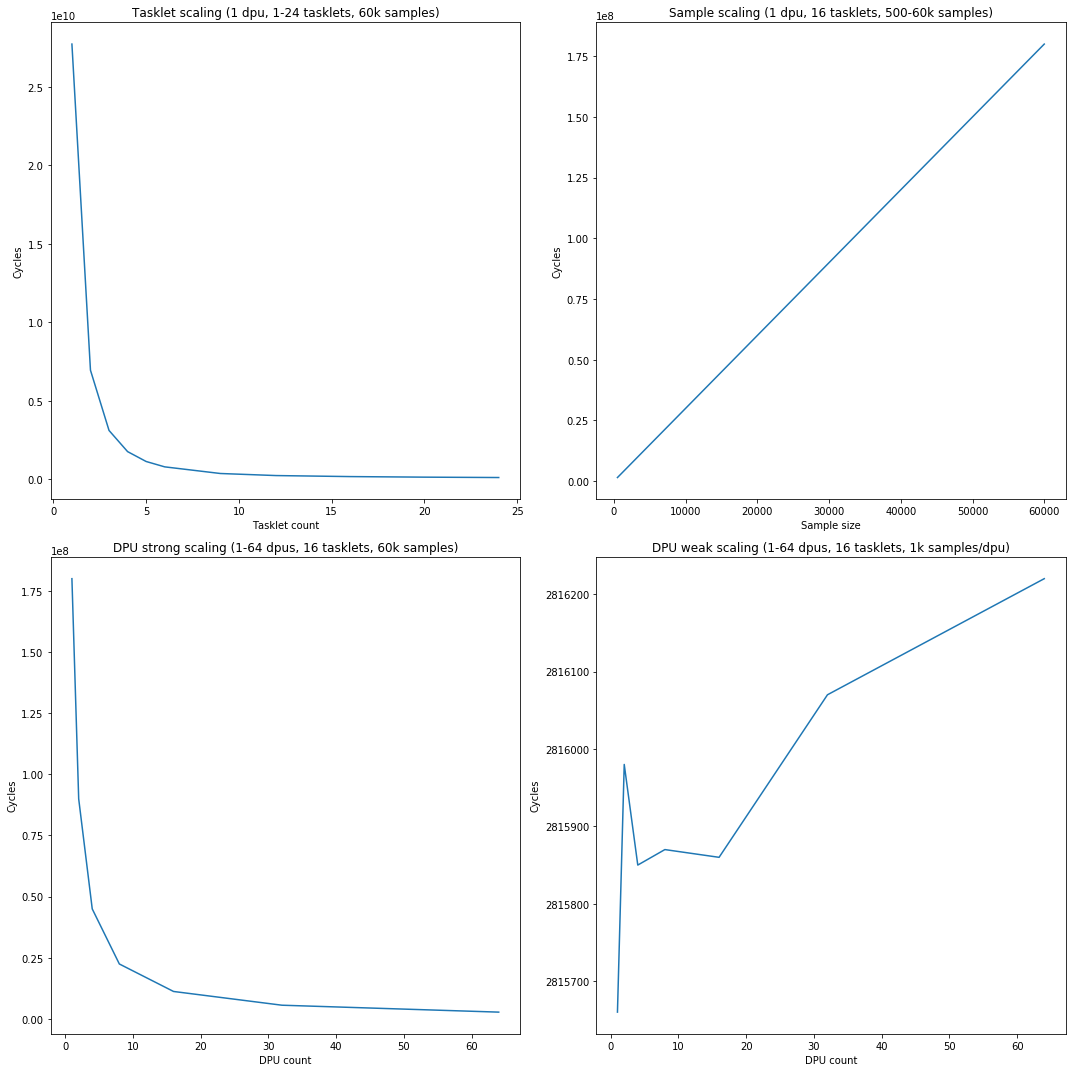

In [262]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax1, ax2, ax3, ax4 = axes.flat

ax1.plot(tasklet_scaling_x, tasklet_scaling_cycles)

ax1.set_xlabel("Tasklet count")
ax1.set_ylabel("Cycles")

ax1.set_title("Tasklet scaling (1 dpu, 1-24 tasklets, 60k samples)")

ax2.plot(sample_scaling_x, sample_scaling_cycles)

ax2.set_xlabel("Sample size")
ax2.set_ylabel("Cycles")

ax2.set_title("Sample scaling (1 dpu, 16 tasklets, 500-60k samples)")

ax3.plot(dpu_strong_scaling_x, dpu_strong_scaling_cycles)

ax3.set_xlabel("DPU count")
ax3.set_ylabel("Cycles")

ax3.set_title("DPU strong scaling (1-64 dpus, 16 tasklets, 60k samples)")

ax4.plot(dpu_weak_scaling_x, dpu_weak_scaling_cycles)

ax4.set_xlabel("DPU count")
ax4.set_ylabel("Cycles")

ax4.set_title("DPU weak scaling (1-64 dpus, 16 tasklets, 1k samples/dpu)")

fig.tight_layout()

fig.savefig('wnn_analysis.png')

plt.show()

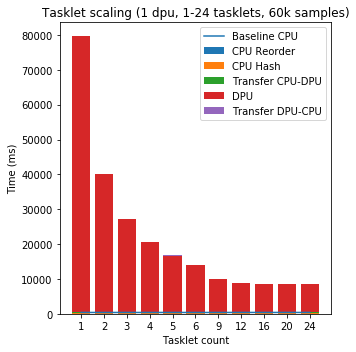

In [265]:
# Make a barchart of the tasklet scaling timings, to show the composition of the total time it takes

fig, ax = plt.subplots(figsize=(5, 5))

str_x = [str(x) for x in tasklet_scaling_x]

start = 1
components = [
    tasklet_scaling_binarize_time,
    tasklet_scaling_reorder_time,
    tasklet_scaling_hash_time,
    tasklet_scaling_transfer1_time,
    tasklet_scaling_dpu_time,
    tasklet_scaling_transfer2_time
][start:]
labels = [
    "CPU Binarize",
    "CPU Reorder",
    "CPU Hash",
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
][start:]
for i, (component, label) in enumerate(zip(components, labels)):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    ax.bar(str_x, component, label=label, bottom=components_before)
ax.plot(str_x, tasklet_scaling_cpu_time, label="Baseline CPU")

ax.set_xticks(str_x)

ax.set_xlabel("Tasklet count")
ax.set_ylabel("Time (ms)")

ax.set_title("Tasklet scaling (1 dpu, 1-24 tasklets, 60k samples)")

ax.legend()

fig.tight_layout()

fig.savefig('tasklet_scaling_time.png')

plt.show()


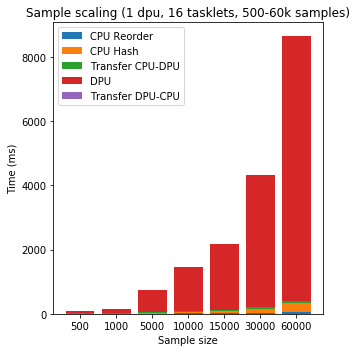

In [249]:
# Same as above but for sample scaling

fig, ax = plt.subplots(figsize=(5, 5))

width = 0.7
str_x = [str(x) for x in sample_scaling_x]

start = 1
components = [
    sample_scaling_binarize_time,
    sample_scaling_reorder_time,
    sample_scaling_hash_time,
    sample_scaling_transfer1_time,
    sample_scaling_dpu_time,
    sample_scaling_transfer2_time
][start:]
labels = [
    "CPU Binarize",
    "CPU Reorder",
    "CPU Hash",
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
][start:]
for i, component in enumerate(components):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    ax.bar(str_x, component, label=labels[i], bottom=components_before)


ax.set_xticks(str_x)

ax.set_xlabel("Sample size")
ax.set_ylabel("Time (ms)")

ax.set_title("Sample scaling (1 dpu, 16 tasklets, 500-60k samples)")

ax.legend()

fig.tight_layout()

fig.savefig('sample_scaling_time.png')

plt.show()


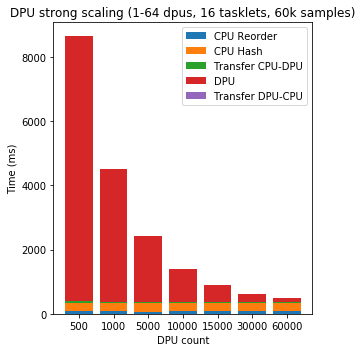

In [250]:
# Same as above but for dpu strong scaling

fig, ax = plt.subplots(figsize=(5, 5))

width = 0.75
str_x = [str(x) for x in sample_scaling_x]
start = 1
components = [
    dpu_strong_scaling_binarize_time,
    dpu_strong_scaling_reorder_time,
    dpu_strong_scaling_hash_time,
    dpu_strong_scaling_transfer1_time,
    dpu_strong_scaling_dpu_time,
    dpu_strong_scaling_transfer2_time
][start:]
labels = [
    "CPU Binarize",
    "CPU Reorder",
    "CPU Hash",
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
][start:]
for i, component in enumerate(components):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    ax.bar(str_x, component, label=labels[i], bottom=components_before)


ax.set_xticks(str_x)

ax.set_xlabel("DPU count")
ax.set_ylabel("Time (ms)")

ax.set_title("DPU strong scaling (1-64 dpus, 16 tasklets, 60k samples)")

ax.legend()

fig.tight_layout()

fig.savefig('dpu_strong_scaling_time.png')

plt.show()  

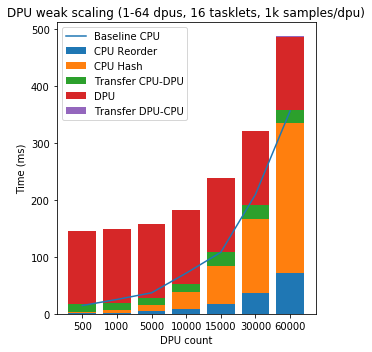

In [266]:
# Same as above but for dpu weak scaling

fig, ax = plt.subplots(figsize=(5, 5))

width = 0.7
str_x = [str(x) for x in sample_scaling_x]

start = 1
components = [
    dpu_weak_scaling_binarize_time,
    dpu_weak_scaling_reorder_time,
    dpu_weak_scaling_hash_time,
    dpu_weak_scaling_transfer1_time,
    dpu_weak_scaling_dpu_time,
    dpu_weak_scaling_transfer2_time
][start:]
labels = [
    "CPU Binarize",
    "CPU Reorder",
    "CPU Hash",
    "Transfer CPU-DPU",
    "DPU",
    "Transfer DPU-CPU"
][start:]
for i, component in enumerate(components):
    components_before = [0 for _ in range(len(component))] if i == 0 else [sum(x) for x in zip(*components[:i])]
    ax.bar(str_x, component, label=labels[i], bottom=components_before)
ax.plot(str_x, dpu_weak_scaling_cpu_time, label="Baseline CPU")

ax.set_xticks(str_x)

ax.set_xlabel("DPU count")
ax.set_ylabel("Time (ms)")

ax.set_title("DPU weak scaling (1-64 dpus, 16 tasklets, 1k samples/dpu)")

ax.legend()

fig.tight_layout()

fig.savefig('dpu_weak_scaling_time.png')

plt.show()